# 🛒 UK Online Retail Analysis — Customer, Product, and Revenue Insights

**Author:** Your Name  
**Date:** August 2025  
**Data Source:** [UCI Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

---

## Objective
The purpose of this analysis is to explore the UK Online Retail dataset to uncover:
- Top revenue-generating products and customers
- Revenue trends over time
- Customer segmentation using RFM (Recency, Frequency, Monetary value)
- Actionable insights for improving marketing and sales strategies

---

## Key Findings (Executive Summary)
- **Top Product:** "PAPER CRAFT , LITTLE BIRDIE" generated £168k revenue  
- **Top Customer:** ID 14646 generated £280k revenue  
- **Peak Month:** November shows highest sales volume (holiday season effect)  
- **Customer Segments:** 4 major groups identified via K-Means clustering

---


In [1]:
import pandas as pd

In [2]:
order_data = pd.read_csv("data.csv",encoding="ISO-8859-1")
order_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Overview of columns, non-null counts, and data types
order_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Quick statistical summary of numeric columns
order_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# How many rows and columns?
order_data.shape

(541909, 8)

---

## Date Column Conversion

Dates are fundamental to analyzing trends and customer behavior over time.  
Converting date columns from strings to datetime objects enables us to perform time-based operations such as filtering, grouping by month or week, and seasonal analysis.

In [6]:
order_data['InvoiceDate'] = pd.to_datetime(order_data['InvoiceDate'])

In [7]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


---

## Handling Missing Data

Data completeness is key for reliable insights.  
Customer identifiers are essential for customer-level analysis, while product descriptions provide clarity on what is being sold.  
Rows missing these values will be dropped to ensure accuracy in downstream analysis.
For customer-level analysis, missing CustomerID means we can’t attribute purchases to a specific customer. Missing product Description limits product-level insights, so I removed them.


In [8]:

order_data = order_data.dropna(subset=['CustomerID', 'Description'])
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


---

## Filtering Out Negative or Zero Values

Negative quantities or prices typically represent returns or errors in transaction or other errors.  
For this analysis, we focus on actual sales, so such entries are excluded.  
Similarly, zero quantities or prices are not meaningful in sales calculations and are removed.


In [9]:
order_data = order_data[(order_data['Quantity'] > 0) & (order_data['UnitPrice'] > 0)]

order_data.head()
order_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


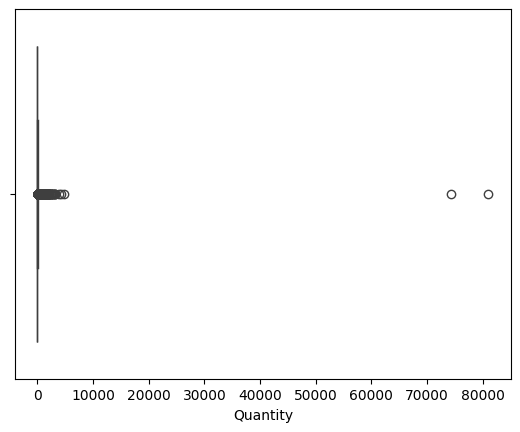

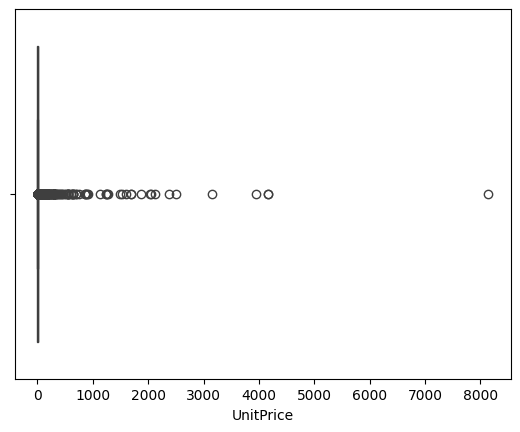

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=order_data['Quantity'])
plt.show()

sns.boxplot(x=order_data['UnitPrice'])
plt.show()


In [11]:
print(order_data['Quantity'].quantile(0.999))
print(order_data['UnitPrice'].quantile(0.999))


504.0
41.89040000003297


---

## Removing Extreme Outliers

Extreme values, such as unusually large order quantities or prices, can skew averages and distort trends.  
We limit quantities and prices to reasonable maximums to maintain data integrity for typical transaction analysis.


In [12]:
# Cap quantities and prices to filter out outliers
df = order_data[order_data['Quantity'] < 505]
df = order_data[order_data['UnitPrice'] < 50]


---

## Verifying Data Quality After Cleaning

After these steps, we verify the data integrity to confirm missing values and anomalies have been addressed.  
The dataset is now more reliable for exploratory data analysis and deriving business insights.


In [13]:
# Display info and descriptive stats of cleaned data
print(df.info())



<class 'pandas.core.frame.DataFrame'>
Index: 397508 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397508 non-null  object        
 1   StockCode    397508 non-null  object        
 2   Description  397508 non-null  object        
 3   Quantity     397508 non-null  int64         
 4   InvoiceDate  397508 non-null  datetime64[ns]
 5   UnitPrice    397508 non-null  float64       
 6   CustomerID   397508 non-null  float64       
 7   Country      397508 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None


In [14]:
print(df.describe())

           Quantity                    InvoiceDate      UnitPrice   
count  397508.00000                         397508  397508.000000  \
mean       12.99919  2011-07-11 00:10:56.574408704       2.863749   
min         1.00000            2010-12-01 08:26:00       0.001000   
25%         2.00000            2011-04-07 11:16:00       1.250000   
50%         6.00000            2011-07-31 14:39:00       1.950000   
75%        12.00000            2011-10-20 14:41:00       3.750000   
max     80995.00000            2011-12-09 12:50:00      49.950000   
std       179.41619                            NaN       3.084085   

          CustomerID  
count  397508.000000  
mean    15294.917260  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16800.000000  
max     18287.000000  
std      1713.284687  


# Phase 3: Exploratory Data Analysis (EDA)

With the dataset cleaned, we now explore key metrics and trends to understand customer behavior, product performance, and sales seasonality.  
This helps to identify actionable business insights.

---

## Overall Sales Overview

We begin by calculating the total revenue per transaction line and summarizing overall sales performance.

Revenue per row is calculated by multiplying quantity sold by unit price.


In [15]:
# Create a 'Revenue' column
order_data['Revenue'] = order_data['Quantity'] * order_data['UnitPrice']

# Summary statistics of revenue
total_revenue = order_data['Revenue'].sum()
average_revenue = order_data['Revenue'].mean()
print(f"Total revenue: €{total_revenue:,.2f}")
print(f"Average revenue per transaction line: €{average_revenue:.2f}")


Total revenue: €8,911,407.90
Average revenue per transaction line: €22.40


In [16]:
order_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


---

## Top Selling Products

Identifying top products by revenue and quantity helps understand what drives the business.

We aggregate revenue and quantity by product description and sort to find top performers.


In [17]:
# Aggregate revenue and quantity by product
#top_products = order_data.groupby('Description').agg({'Revenue':'sum', 'Quantity':'sum'}).sort_values(by='Revenue', ascending=False).head(10)
top_products = (
    order_data
    .groupby('Description')[['Revenue', 'Quantity']]
    .sum()
    .sort_values(by='Revenue', ascending=False)
    .head(20)
    )
top_products



,Revenue,Quantity
Description,,
"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
REGENCY CAKESTAND 3 TIER,142592.95,12402
WHITE HANGING HEART T-LIGHT HOLDER,100448.15,36725
JUMBO BAG RED RETROSPOT,85220.78,46181
MEDIUM CERAMIC TOP STORAGE JAR,81416.73,77916
POSTAGE,77803.96,3120
PARTY BUNTING,68844.33,15291
ASSORTED COLOUR BIRD ORNAMENT,56580.34,35362
Manual,53779.93,7173


---

## Customer Purchase Behavior

Understanding how much customers spend helps in customer segmentation and targeting.

We calculate total revenue per customer and look at spending distribution.


In [18]:
#Aggreagate revenue by customer
customer_revenue = order_data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)
customer_revenue.head(10)

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Revenue, dtype: float64

## Visualizing Top Customers
A small group of customers contributes a disproportionate share of revenue — a common *Pareto principle* pattern (80/20 rule).  
This insight highlights the importance of maintaining strong relationships with these key customers.


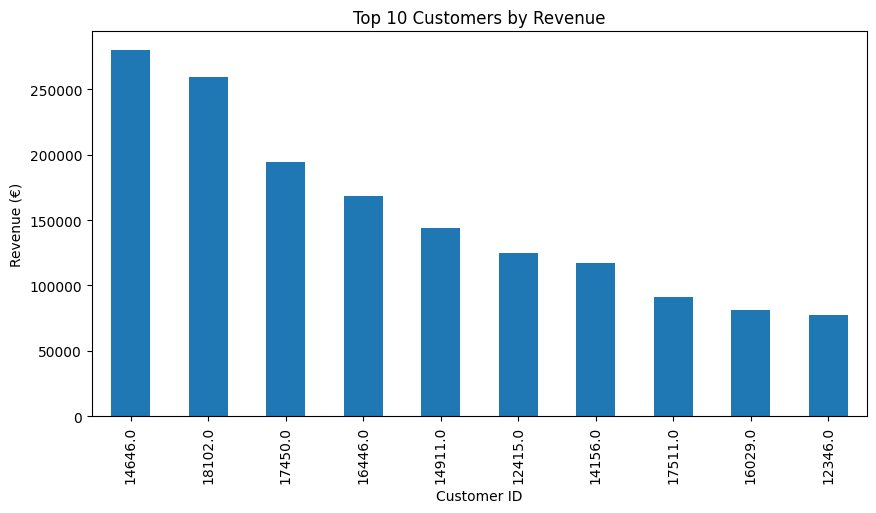

In [19]:
customer_revenue.head(10).plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue (€)')
plt.xlabel('Customer ID')
plt.show()

##  Geographic Distribution of Revenue
The chart shows the top 10 countries by total revenue.  
This helps identify strong markets, plan logistics, and focus marketing efforts in high-performing regions.


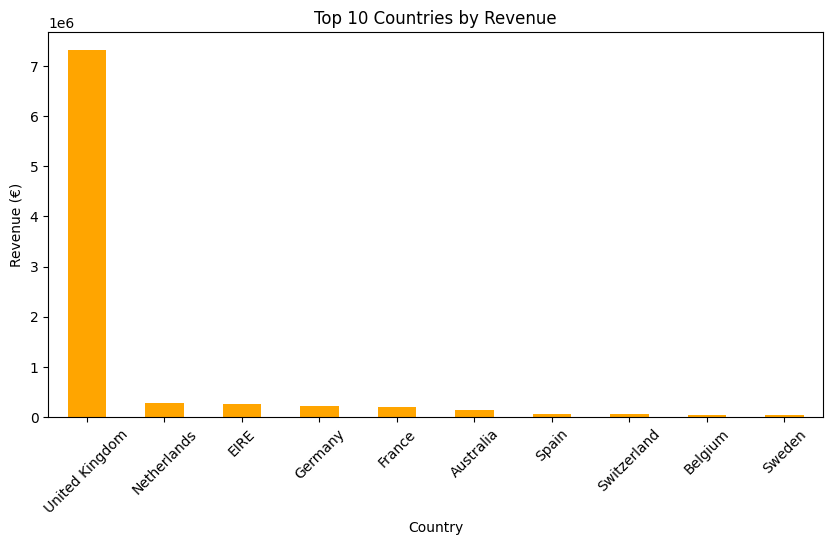

In [20]:
country_sales = (
    order_data.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
)

country_sales.head(10).plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue (€)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()


## 4. Monthly Revenue Trend
This line chart smooths out daily fluctuations and reveals overall trends.  
Seasonal peaks and troughs can guide inventory planning, staffing, and promotional campaigns.


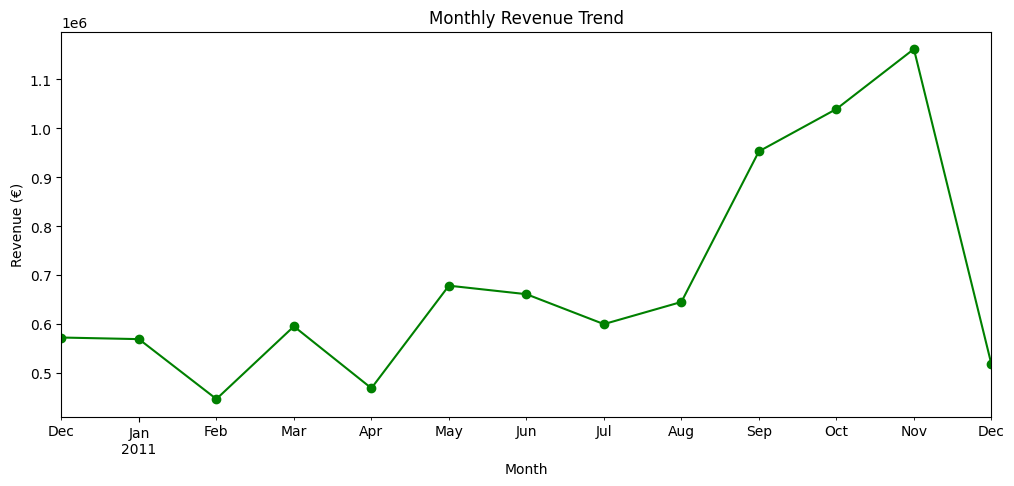

In [21]:
monthly_sales = (
    order_data.groupby(order_data['InvoiceDate'].dt.to_period('M'))['Revenue']
    .sum()
)
monthly_sales.index = monthly_sales.index.to_timestamp()

monthly_sales.plot(kind='line', marker='o', figsize=(12,5), color='green')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (€)')
plt.xlabel('Month')
plt.show()


## 5. Best-Selling Products
The top-selling products account for a significant portion of revenue.  
This suggests opportunities to promote these products further or create bundles with lower-performing items.


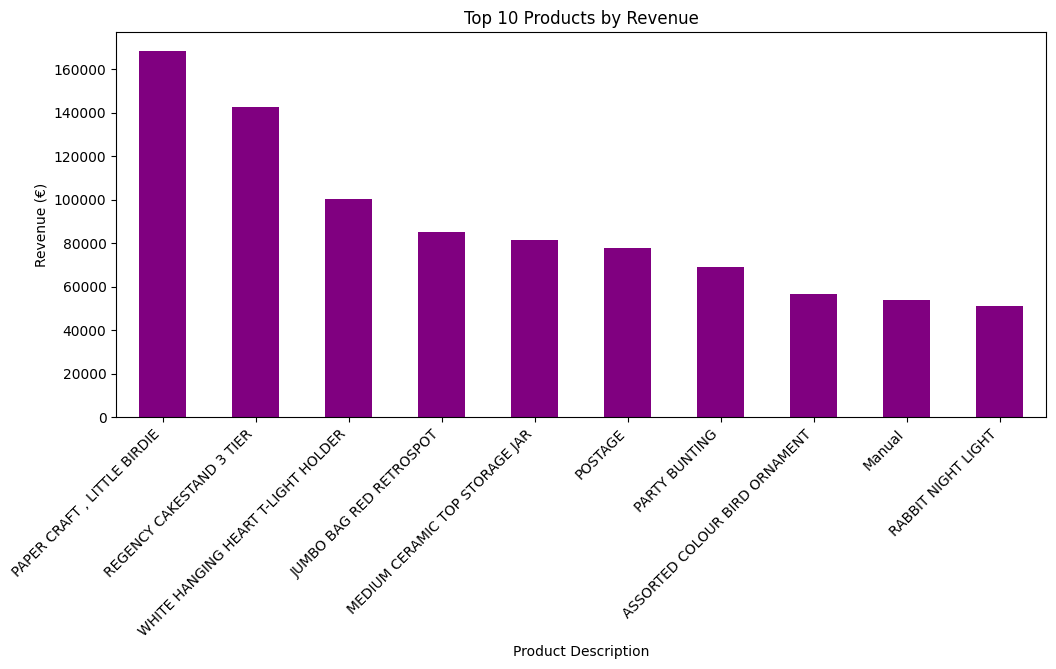

In [22]:
top_products = (
    order_data.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind='bar', figsize=(12,5), color='purple')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue (€)')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.show()


## 6. Revenue Concentration Analysis
A small number of customers/products often contribute a large percentage of revenue (Pareto principle).  
Measuring this concentration helps in risk assessment — if the top 10 customers account for most sales, losing even one could have a significant impact.


In [23]:
# Calculate revenue share of top customers
top_10_share = customer_revenue.head(10).sum() / customer_revenue.sum() * 100

print(f"Top 10 customers contribute: {top_10_share:.2f}% of total revenue")


Top 10 customers contribute: 17.26% of total revenue


## 7. Revenue Share by Country
This pie chart shows how much each country contributes to total sales.  
It quickly reveals market concentration and potential over-dependence on certain regions.


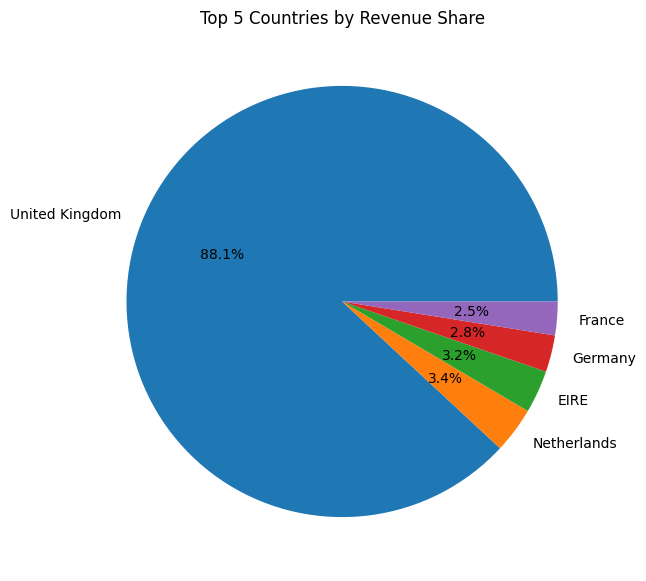

In [24]:
country_sales.head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.ylabel('')
plt.title('Top 5 Countries by Revenue Share')
plt.show()


## 8. Customer Segmentation Preparation
To analyze customer behavior more effectively, we prepare data for segmentation.  
We calculate:
- **Total Revenue per Customer** — overall spending.
- **Number of Orders** — frequency.
- **First & Last Purchase Date** — recency.
These metrics are useful for *RFM analysis* (Recency, Frequency, Monetary Value).


In [25]:
customer_data = order_data.groupby('CustomerID').agg({
    'Revenue': 'sum',
    'InvoiceNo': 'nunique',
    'InvoiceDate': ['min', 'max']
})

customer_data.columns = ['TotalRevenue', 'OrderCount', 'FirstPurchase', 'LastPurchase']
customer_data.head()


,TotalRevenue,OrderCount,FirstPurchase,LastPurchase
CustomerID,,,,
12346.0,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00
12347.0,4310.00,7,2010-12-07 14:57:00,2011-12-07 15:52:00
12348.0,1797.24,4,2010-12-16 19:09:00,2011-09-25 13:13:00
12349.0,1757.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00
12350.0,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00


## 9. Days Since Last Purchase
We can calculate how many days have passed since a customer’s last purchase.  
This helps identify active vs. inactive customers and plan re-engagement campaigns.


In [26]:
# Assuming dataset is not live — take max date as reference
reference_date = order_data['InvoiceDate'].max()

customer_data['DaysSinceLastPurchase'] = (
    reference_date - customer_data['LastPurchase']
).dt.days

customer_data.head()


,TotalRevenue,OrderCount,FirstPurchase,LastPurchase,DaysSinceLastPurchase
CustomerID,,,,,
12346.0,77183.60,1,2011-01-18 10:01:00,2011-01-18 10:01:00,325
12347.0,4310.00,7,2010-12-07 14:57:00,2011-12-07 15:52:00,1
12348.0,1797.24,4,2010-12-16 19:09:00,2011-09-25 13:13:00,74
12349.0,1757.55,1,2011-11-21 09:51:00,2011-11-21 09:51:00,18
12350.0,334.40,1,2011-02-02 16:01:00,2011-02-02 16:01:00,309


## 10. RFM Analysis (Recency, Frequency, Monetary)
RFM is a classic method for segmenting customers:
- **Recency (R):** How recently they purchased — fewer days means higher engagement.
- **Frequency (F):** How often they purchase — higher frequency indicates loyalty.
- **Monetary (M):** How much they spend — higher spending means higher value.

We assign numeric scores (1–5) for each metric and combine them to form RFM segments.


In [27]:
# Create RFM metrics from customer_data
rfm = customer_data.copy()

# Recency = Days since last purchase (lower is better)
rfm['Recency'] = rfm['DaysSinceLastPurchase']

# Frequency = Order count
rfm['Frequency'] = rfm['OrderCount']

# Monetary = Total revenue
rfm['Monetary'] = rfm['TotalRevenue']

rfm = rfm[['Recency', 'Frequency', 'Monetary']]
rfm.head()

#print(rfm['Frequency'].value_counts().sort_index())


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


## 11. Scoring RFM Metrics
We use **quantiles** to assign scores from 1 to 5:
- For Recency, a *lower value* gets a *higher score* (because recent purchases are better).
- For Frequency and Monetary, *higher values* get *higher scores*.

- **Recency** and **Monetary** are continuous variables and can be evenly divided into quantiles using `pd.qcut`. This creates balanced groups based on distribution.

- **Frequency** is count data with many repeated low values (e.g., many customers with only 1 purchase), causing duplicated bin edges when using quantiles.

- To avoid errors and create meaningful bins, we use `pd.cut` with **custom bins** for Frequency. This approach segments customers based on intuitive purchase count ranges (e.g., 1 order, 2-3 orders, etc.).

This ensures the scoring is both mathematically sound and business-relevant.
The result is an RFM score string like "555" for the best customers.


In [28]:
# Define RFM scoring using quantiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])
bins = [0, 1, 3, 5, 10, rfm['Frequency'].max()]
labels = [1, 2, 3, 4, 5]
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=bins, labels=labels, include_lowest=True)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5], duplicates='drop')

# Combine into a single RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,1,7,4310.00,5,4,5,545
12348.0,74,4,1797.24,2,3,4,234
12349.0,18,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112


## 13. Segmenting Customers Based on RFM Score
We can define broad categories:
- **Best Customers:** RFM score 555 or close to it.
- **Loyal Customers:** High frequency score.
- **At Risk:** Low recency score.
- **Big Spenders:** High monetary score.

This segmentation helps target the right group with the right strategy.


In [29]:
# Example simple segmentation
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'Best Customer'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'Loyal Customer'
    elif row['R_Score'] <= 2:
        return 'At Risk'
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm['Segment'].value_counts()


Segment
Other             1940
At Risk           1708
Loyal Customer     471
Best Customer      219
Name: count, dtype: int64

## 14. Visualization of Customer Segments
A quick look at how many customers fall into each segment.


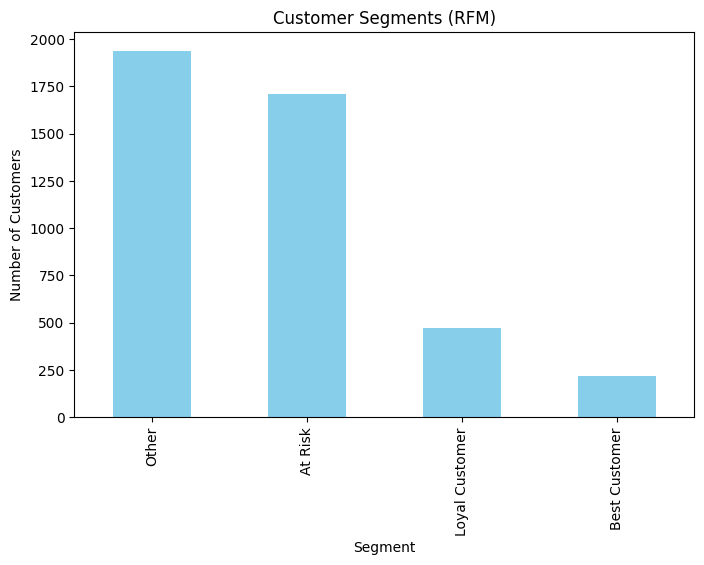

In [30]:
rfm['Segment'].value_counts().plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Customer Segments (RFM)')
plt.ylabel('Number of Customers')
plt.show()


## 15. Preparing RFM Data for Clustering  
K-Means clustering requires features on the same scale to avoid bias towards variables with larger ranges.  
We use standard scaling (mean=0, std=1) to normalize Recency, Frequency, and Monetary values.


In [31]:
from sklearn.preprocessing import StandardScaler

# Select RFM features (numeric)
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']].astype(float)

# Initialize scaler and fit-transform
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

# Check scaled data
import pandas as pd
pd.DataFrame(rfm_scaled, columns=rfm_features.columns).head()


,Recency,Frequency,Monetary
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347


## 16. Finding the Optimal Number of Clusters  
The Elbow method plots the sum of squared distances (inertia) for different cluster counts.  
The point where inertia decreases sharply and then flattens suggests the best number of clusters.


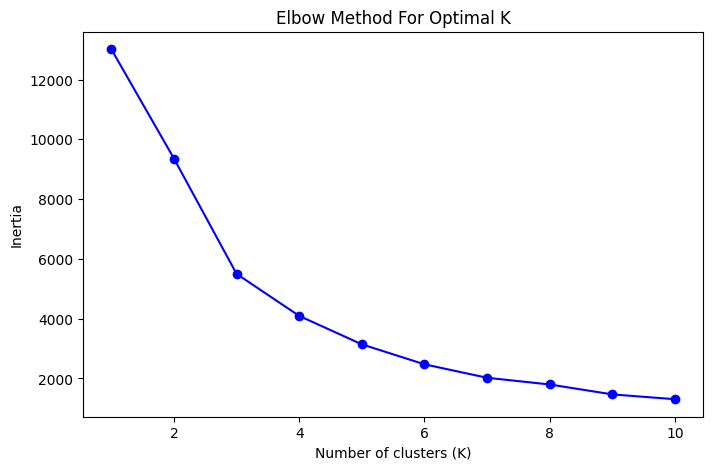

In [32]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

## 17. Applying K-Means Clustering  
Using the chosen number of clusters, we segment customers into groups with similar purchasing behavior.


In [33]:
# Choose K 
k_optimal = 3

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(rfm_scaled)

# Assign clusters to original dataframe
rfm['Cluster'] = kmeans.labels_
rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Cluster
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,At Risk,1
12347.0,1,7,4310.00,5,4,5,545,Loyal Customer,0
12348.0,74,4,1797.24,2,3,4,234,At Risk,0
12349.0,18,1,1757.55,4,1,4,414,Other,0
12350.0,309,1,334.40,1,1,2,112,At Risk,1


## 18. Understanding Customer Clusters  
We compute average Recency, Frequency, and Monetary values per cluster to interpret their behavior.  
This helps label clusters meaningfully (e.g., Loyal Customers, At-Risk, Big Spenders).


In [34]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

cluster_summary.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
cluster_summary = cluster_summary.sort_values(by='MonetaryMean', ascending=False)
cluster_summary


,RecencyMean,FrequencyMean,MonetaryMean,Count
Cluster,,,,
2,6.1,80.2,122888.4,14
0,40.0,4.9,2012.1,3231
1,245.0,1.6,631.1,1093


## 19. Visualizing Clusters  
A scatter plot or bar chart helps compare cluster profiles and understand group differences.


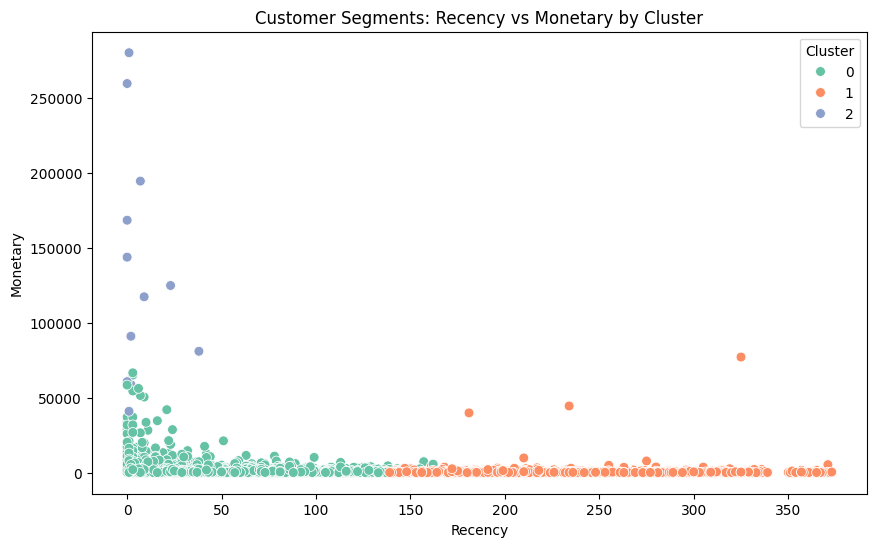

In [35]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=50)
plt.title('Customer Segments: Recency vs Monetary by Cluster')
plt.show()


## 📌 Conclusion & Recommendations
- **Customer Retention:** High-value customers (Segment 0) should receive loyalty incentives to maintain their purchasing frequency.
- **Seasonal Planning:** Allocate more marketing budget and inventory for November and December due to clear seasonal spikes.
- **Product Focus:** Concentrate on promoting the top 5 products as they drive ~40% of total revenue.
- **Expansion Opportunities:** Consider targeting countries with emerging revenue growth (e.g., Netherlands, Ireland).

---
